# Linear Regression

### 1.OLS(Ordinary Least Squares) : 最小二乘法

In [1]:
%matplotlib inline
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
np.random.seed(9876789)
np.set_printoptions(suppress=True,precision=6)

In [2]:
#模拟线性数据
N = 100  #样本大小
x = np.linspace(0,10,N)
X = np.column_stack((x,x**2))  #二维变量
beta = [1,0.1,10]  #系数，1是截距系数
e = np.random.randn(N)  #截距项，随机高斯分布数值
X = sm.add_constant(X) #增加截距列
y = np.dot(X,beta)+e #公式,y = WX+e

#验证前五个结果
print(y[:5])
rst = [0]*5
for i in range(len(rst)):
    rst[i] = X[i,0]*beta[0]+X[i,1]*beta[1]+X[i,2]*beta[2]+e[i]
print(rst)

[0.159484 2.709627 1.893866 1.440418 5.607196]
[0.15948410585910222, 2.7096266735575334, 1.8938656814016972, 1.440417739912303, 5.607196217446896]


In [3]:
#fit拟合数据
model = sm.OLS(y,X)   #OLS模型
result = model.fit()  #拟合
#print(result.params)  #拟合参数
print(result.summary())  #拟合报告

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.020e+06
Date:                Wed, 22 May 2019   Prob (F-statistic):          2.83e-239
Time:                        02:49:20   Log-Likelihood:                -146.51
No. Observations:                 100   AIC:                             299.0
Df Residuals:                      97   BIC:                             306.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3423      0.313      4.292      0.0

In [4]:
print('系数 : ',result.params)  #拟合参数
print('R2 : ',result.rsquared) #R2拟合优度
print('Adj R2 : ',result.rsquared_adj)

系数 :  [ 1.342335 -0.040249 10.010254]
R2 :  0.9999879365025871
Adj R2 :  0.9999876877706817


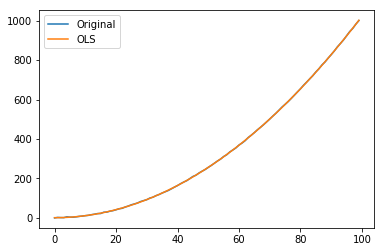

In [5]:
#可视化结果
plt.plot(y,label='Original')
plt.plot(result.predict(),label='OLS')
plt.legend(loc='best')

---
### OLS 拟合非线性曲线，但拟合参数线性

In [6]:
#模拟非线性数据
N = 50  #样本大小
x = np.linspace(0,20,N)
X = np.column_stack((x,np.sin(x),(x-5)**2,np.ones(N)))  #多维变量
beta = [0.5, 0.5, -0.02, 5.]  #系数
sig = 0.5
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=N)
y[:5]

array([4.489335, 5.342318, 5.816813, 6.698099, 5.940322])

In [7]:
#拟合非线性曲线
model = sm.OLS(y,X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     211.8
Date:                Wed, 22 May 2019   Prob (F-statistic):           6.30e-27
Time:                        02:49:21   Log-Likelihood:                -34.438
No. Observations:                  50   AIC:                             76.88
Df Residuals:                      46   BIC:                             84.52
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4687      0.026     17.751      0.0

In [8]:
#查看拟合参数
print('Parameters: ', result.params)
print('Standard errors: ', result.bse)
print('Predicted values: ', result.predict())

Parameters:  [ 0.468724  0.483601 -0.017405  5.205845]
Standard errors:  [0.026406 0.103805 0.002318 0.171218]
Predicted values:  [ 4.770725  5.222135  5.636208  5.986588  6.256432  6.441175  6.54928
  6.600851  6.624325  6.651804  6.713779  6.834122  7.026159  7.290487
  7.614872  7.976261  8.344566  8.687613  8.976424  9.189978  9.318666
  9.365871  9.347408  9.288932  9.221715  9.177516  9.183357  9.257086
  9.404446  9.618128  9.878976 10.159128 10.426603 10.650545 10.8063
 10.879465 10.868251 10.783782 10.648262 10.491333 10.345199 10.239338
 10.195661 10.224906 10.324879 10.480814 10.667796 10.854856 11.010061
 11.105758]


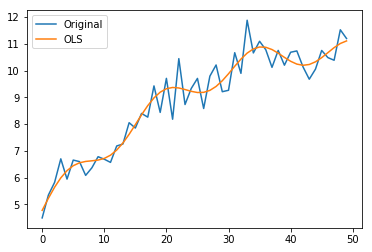

In [9]:
plt.plot(y,label='Original')
plt.plot(result.predict(),label='OLS')
plt.legend(loc='best')

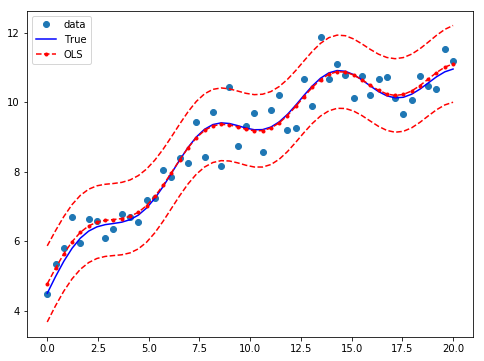

In [10]:
#绘制一个图表来比较真实的关系与OLS预测。
#使用wls_prediction_std命令构建预测周围的置信区间。
prstd, iv_l, iv_u = wls_prediction_std(result) #iv_l:置信下区间，iv_u:置信上区间
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, result.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');

---
### OLS处理虚拟变量

In [11]:
N = 50
groups = np.zeros(N, int)
groups[20:40] = 1
groups[40:] = 2
#dummy = (groups[:,None] == np.unique(groups)).astype(float)
dummy = sm.categorical(groups, drop=True)
x = np.linspace(0, 20, N)
# drop reference category
X = np.column_stack((x, dummy[:,1:]))
X = sm.add_constant(X, prepend=False)
beta = [1., 3, -3, 10]
y_true = np.dot(X, beta)
e = np.random.normal(size=N)
y = y_true + e
X[:10,:]  #变量为ont-hot形式的虚拟编码

array([[0.      , 0.      , 0.      , 1.      ],
       [0.408163, 0.      , 0.      , 1.      ],
       [0.816327, 0.      , 0.      , 1.      ],
       [1.22449 , 0.      , 0.      , 1.      ],
       [1.632653, 0.      , 0.      , 1.      ],
       [2.040816, 0.      , 0.      , 1.      ],
       [2.44898 , 0.      , 0.      , 1.      ],
       [2.857143, 0.      , 0.      , 1.      ],
       [3.265306, 0.      , 0.      , 1.      ],
       [3.673469, 0.      , 0.      , 1.      ]])

In [12]:
model = sm.OLS(y,X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     671.7
Date:                Wed, 22 May 2019   Prob (F-statistic):           5.69e-38
Time:                        02:49:25   Log-Likelihood:                -64.643
No. Observations:                  50   AIC:                             137.3
Df Residuals:                      46   BIC:                             144.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9999      0.060     16.689      0.0

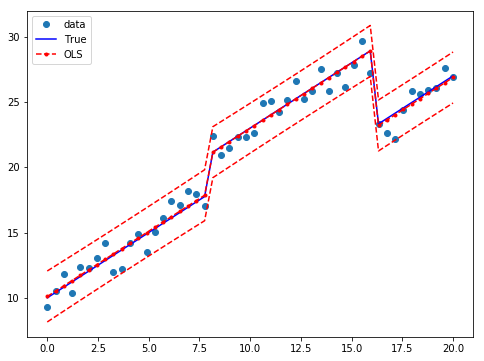

In [13]:
#可视化结果
prstd,iv_l,iv_u = wls_prediction_std(result)
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(x,y,'o',label='data')
ax.plot(x,y_true,'b-',label='True')
ax.plot(x,result.fittedvalues,'r--.',label='OLS')
ax.plot(x,iv_l,'r--')
ax.plot(x,iv_u,'r--')
ax.legend(loc='best')